In [1]:
import pmdarima
import pytz
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('../idena_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df.set_index(["Date"], drop=False, inplace=True)
df.head()

C:\Users\Predrag\AppData\Local\Temp\ipykernel_3044\2109293243.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,idena_unscaled,idena_monthly,scale,idena
Date,,,,,,,,,,,,,,,,
2020-08-11,2020-08-11,0.125496,0.137770,0.124239,0.130634,0.130634,40783,1817.0,0.273,0.000,298,6.666667,0,37.0,0.37,0.00
2020-08-12,2020-08-12,0.130674,0.162275,0.128384,0.138122,0.138122,65517,1829.0,0.182,0.091,300,6.750000,0,37.0,0.37,0.00
2020-08-13,2020-08-13,0.138128,0.138128,0.118348,0.127606,0.127606,41988,2149.0,0.083,0.167,302,6.615385,0,37.0,0.37,0.00
2020-08-14,2020-08-14,0.127084,0.201024,0.121670,0.201024,0.201024,104705,2208.0,0.000,0.000,304,7.083333,34,37.0,0.37,12.58
2020-08-15,2020-08-15,0.201097,0.202423,0.138915,0.162744,0.162744,50419,2267.0,0.100,0.000,307,5.636364,0,37.0,0.37,0.00


In [2]:
print(pd.date_range(
  start="2020-08-11", end="2022-02-04").difference(df.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [3]:
from python_scripts.time_series_utilities import check_stationarity, plot_pacf_acf

check_stationarity(df, 'Close')

ADF Statistic: -2.855089470204885
p-value: 0.05082528405772454
Critial Values:
   1%, -3.442472769145813
Critial Values:
   5%, -2.8668873212324817
Critial Values:
   10%, -2.5696179384812297

KPSS Statistic: 0.289286
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

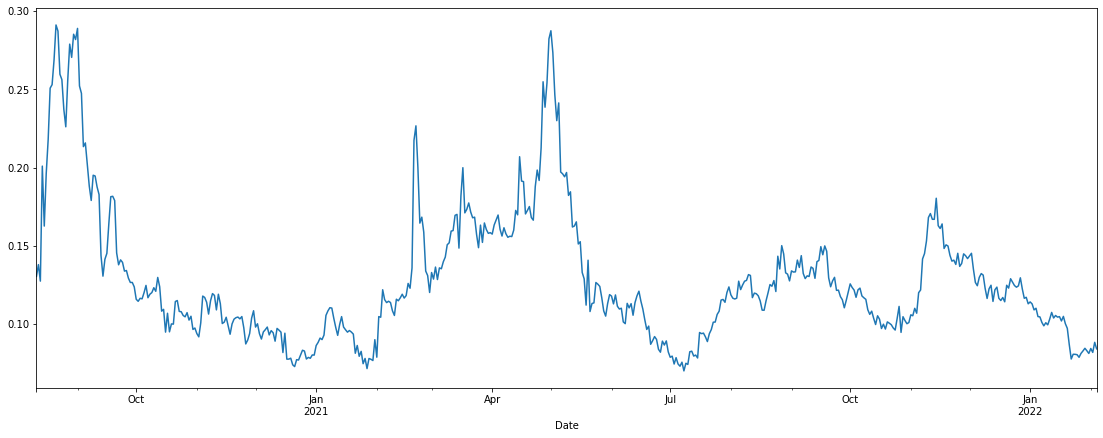

In [4]:
df.Close.plot(figsize=(19,7))

In [5]:
import numpy as np

df['transformed_Close'] = np.log(df.Close)
check_stationarity(df, 'transformed_Close')

ADF Statistic: -2.6223718842268138
p-value: 0.0884610424433862
Critial Values:
   1%, -3.442517884424376
Critial Values:
   5%, -2.8669071815780116
Critial Values:
   10%, -2.5696285219478736

KPSS Statistic: 0.224622
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


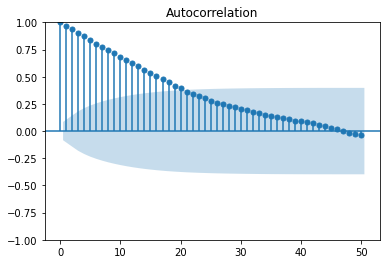

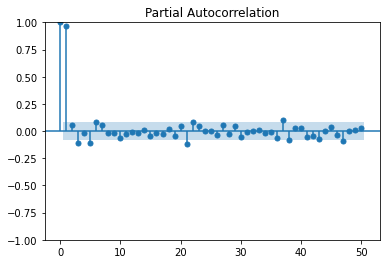

In [6]:
plot_pacf_acf(df, 'Close')

In [2]:
from python_scripts.sarima_helper import train_test_split_continual

train, test = train_test_split_continual(df, 0.3)
model = sm.tsa.arima.ARIMA(train.Close, order=(1, 0, 0))

c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
model = model.fit()

In [9]:
sm.stats.acorr_ljungbox(model.resid, lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,50.226442,0.464416


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

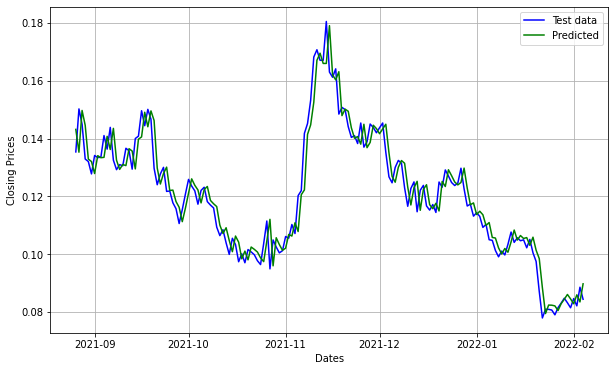

Test MAPE: 3.740


In [10]:
from matplotlib import pyplot as plt
from python_scripts.time_series_utilities import test_arima_one_step

history = [x for x in train.Close]
predictions = list()
mapes = list()
for t in range(len(test)):
    model = sm.tsa.ARIMA(history, order=(1, 0, 0))
    fitted_model = model.fit()
    output = fitted_model.forecast()
    yhat = output[0]
    predicted = yhat
    predictions.append(predicted)
    expected = test.Close[t]
    history.append(test.Close[t])
    mape = np.mean(np.abs((expected - predicted) / expected)) * 100
    mapes.append(mape)
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test.Date, test.Close, 'blue', label='Test data')
plt.plot(test.Date, predictions, 'green', label='Predicted')
plt.legend()
plt.show()
print('Test MAPE: %.3f' % (np.mean(np.abs((test.Close - predictions) / test.Close)) * 100))

In [11]:
arima_model = pmdarima.auto_arima(df.Close,
                                  start_p = 0,
                                  start_q= 0,
                                  d=None,
                                  max_p=27,
                                  max_q=27,
                                  test='adf',
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3368.840, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3369.405, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3369.027, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3370.806, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3373.765, Time=2.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3369.357, Time=2.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3370.866, Time=3.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3370.742, Time=2.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3371.309, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3375.721, Time=1.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3370.937, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3371.366, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3371.193, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0]  

In [12]:
sm.stats.acorr_ljungbox(arima_model.resid(), lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,55.587012,0.272496


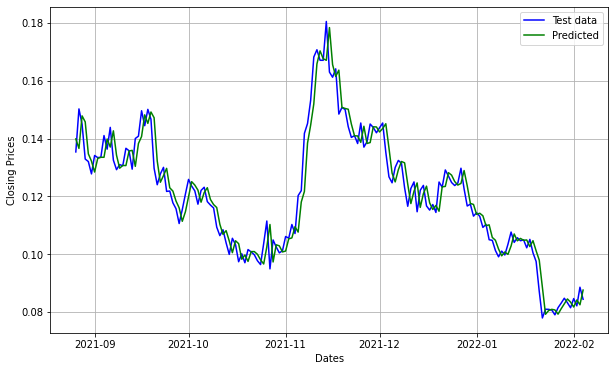

Test MAPE: 3.632


([0.13985240025777407,
  0.13657124586474784,
  0.1478334646881272,
  0.14576488072473787,
  0.13469173508996282,
  0.13215948259749968,
  0.12839667030820937,
  0.13312030781312176,
  0.13350400233569348,
  0.13350093114209588,
  0.1398343969492881,
  0.13703969400137253,
  0.14265261474638846,
  0.13421899264240525,
  0.12972272816830172,
  0.13068575737288413,
  0.1306314435885749,
  0.13565719606874874,
  0.13589788631212738,
  0.13036290124157326,
  0.13827098786802522,
  0.1406845024755217,
  0.14819231274243697,
  0.14522957523784547,
  0.14917781827035367,
  0.1471988503536791,
  0.13222138347486578,
  0.12485767056858106,
  0.12715666833253725,
  0.12966182069820503,
  0.12293597224796365,
  0.12180728505809768,
  0.1183638360506028,
  0.11600916440227962,
  0.11134437817888698,
  0.11463432238330537,
  0.11992283409902088,
  0.12505601117868886,
  0.1238899039426268,
  0.12213586325282434,
  0.11795600205203301,
  0.12129236379664395,
  0.12296887758454089,
  0.11889301337307

In [4]:

from python_scripts.time_series_utilities import test_arima_one_step
test_arima_one_step(train, test, 1,1,0)

In [ ]:
from python_scripts.time_series_utilities import grid_search_hyperparams

p_s = range(0,10)
q_s = range(0,10)
d_s = [0,1]

grid_search_hyperparams(p_s, q_s, d_s, train, test)